<a href="https://colab.research.google.com/github/velonisa/AvocadoDA/blob/main/Groupwork_Team4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Avocado Market Analysis**

Team 04: Lingqi Guo, Xinlin Huang, Zirui Zhou, Lingqiao Zhu

***Introduction:***


> Avocados, also known as butter fruit or alligator pears, are proven to be one of the most prevailing fruits (or vegetables) for American households. As a result, the world has shown great interest in exploring various cooking approaches to avocado (guacamole dips, smoothies, brownies, and even salads and wraps). The demand for avocado in different communities has also increased significantly in recent years, leading the prices to soar in the past decade. 



> Our team hopes to study the dataset provided by Hass Avocado to analyze the market of avocados in the States. We will first introduce the dataset and summarize relevant statistics, and then analyze the sales trend by avocado type and geographical distribution. Next, we will employ regression analysis and try to decipher the reasons for differences in sales. Finally, we will conclude and offer marketing advice for avocado retailers.



![picture](https://drive.google.com/uc?export=view&id=1It9LQI0DaXsuVTMU6deOv2p7BHmqw4EJ)

In [ ]:
#import packages
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import pylab as pl
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
#import data in google colab
from google.colab import files
import io
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['avocado.csv']))

Saving avocado.csv to avocado (1).csv


In [ ]:
#import data (local)
#data = pd.read_csv('avocado.csv')
# data cleansing, dropped first column and converted to a pandas datetime object
data = data.drop(columns=['Unnamed: 0'])
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
# Filtering out TotalUS and other regions
data_TotalUS = data[data['region']=='TotalUS']
data_other = data[(data['region']=='West') | (data['region']=='California') \
     | (data['region']=='SouthCentral') |  (data['region']=='Northeast') \
     | (data['region']=='GreatLakes') | (data['region']=='Southeast')\
     | (data['region']=='Midsouth') |  (data['region']=='Plains')]
data = data.drop(data_TotalUS.index)
data = data.drop(data_other.index)

***Data Description***


> The dataset we use contain weekly retial data on Hass avocados in different US cities and regions from Juanary 2015 to May 2018. The total number of observations is over 15,000. The variables given or created by us later are defined as below.

*   Date - The date of the observation
*   AveragePrice - the average price of a single avocado
*   type - conventional or organic
*   year - the year
*   Region - the city or region of the observation
*   4046 - Total number of avocados with PLU 4046 sold
*   4225 - Total number of avocados with PLU 4225 sold
*   4770 - Total number of avocados with PLU 4770 sold
*   Value - Sales value = Average Price * Volume
*   type dummies -  1 if it is of the type specified, 0 otherwise
*   region dummies -  1 if it is of the city specifies, 0 otherwise


      Note: 4046 Avocado：Small/Medium Hass Avocado (~3-5oz avocado)
            4225 Avocado：Large Hass Avocado (~8-10oz avocado)
            4770 Avocado：Extra Large Hass Avocado (~10-15oz avocado)


***Summary Statistics***


> The mean of the average prices in the US cities in our dataset is about 1.41 per avocado. The highest average price is 3.35, while the lowest is 0.44. The mean total volume is about 250,000.

> We calculate the annual average price index for each city and plot it in the first diagram below. Only the bars labeled in blue have an index lower than 100, which implies a lower price than the national average.

> The second graph illustrates the distribution of average prices. The positive skewness indicates that there are a few high outliers in the distribution of values. Meanwhile, the high kurtosis suggests a leptokurtic distribution.

> For conventional avocados, the mean average price is 1.16, and the mean volume is 480,000. In contrast, for organic avocados, the mean average price is 1.66, and the mean volume is 14,000.

> The pie chart below shows consumers' preference among different sizes of avocados. Since the 4770 avocados take less than 5%, consumers do not have a great demand for XLarge avocados.




In [ ]:
def bar_city_index(data,data_TotalUS,year):
    '''
    year = 2015, 2016 or 2017
    Annual Average Price Index = City Avg Price / National Total Average *100
    '''
    sample = data[data['year']==year]
    sample = sample.groupby('region')['AveragePrice'].mean().reset_index()
    sample = sample.sort_values(by='AveragePrice',ascending=False).reset_index(drop=True)
    national = data_TotalUS[data_TotalUS['year']==year]['AveragePrice'].mean()
    sample['API'] = sample['AveragePrice']/national*100
    sample_h = sample[sample['API']>=100]
    sample_l = sample[sample['API']<100]
    plt.figure('Bar index',figsize=(10,3),dpi=100)
    plt.bar(sample_h['region'],sample_h['API'],color='r')
    plt.bar(sample_l['region'],sample_l['API'],color='b')
    plt.xticks(rotation=90)
    plt.xlabel('City')
    plt.ylabel('API(%)')
    plt.title('Annual Average Price Index of cities, '+str(year))
    plt.show()

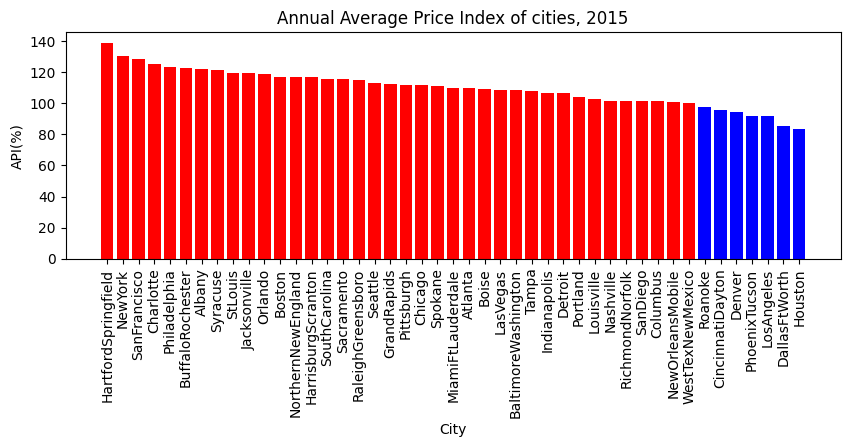

In [ ]:
bar_city_index(data,data_TotalUS,2015)

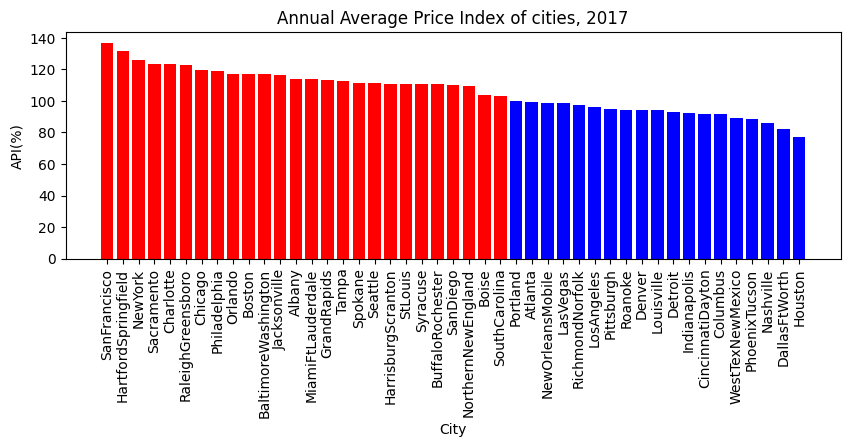

In [ ]:
bar_city_index(data,data_TotalUS,2017)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


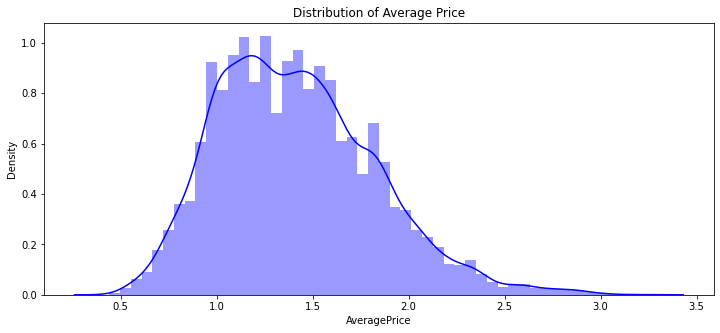

In [ ]:
pl.figure(figsize=(12,5)) # The distribution of average price
pl.title("Distribution of Average Price")
ax = sns.distplot(data["AveragePrice"], color = 'b')

In [ ]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
count,15207.000000,1.520700e+04,1.520700e+04,1.520700e+04,15207.000000,1.520700e+04,1.520700e+04,15207.000000,15207.000000,15207.000000,15207.000000
mean,1.414563,2.494853e+05,8.135979e+04,8.918607e+04,6868.676961,7.207038e+04,5.508965e+04,16074.648610,906.077084,2016.147892,6.177155
std,0.412833,4.343753e+05,1.985188e+05,1.662405e+05,19871.043021,1.437335e+05,1.246774e+05,42267.853388,3874.756233,0.939943,3.534155
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,1.000000
25%,1.100000,8.534190e+03,5.421000e+02,2.100820e+03,0.000000,3.552710e+03,1.816960e+03,45.370000,0.000000,2015.000000,3.000000
50%,1.370000,6.460250e+04,4.543590e+03,1.752057e+04,101.670000,2.399658e+04,1.647975e+04,1569.300000,0.000000,2016.000000,6.000000
75%,1.680000,3.153967e+05,7.670588e+04,9.547540e+04,3400.150000,8.204990e+04,6.372594e+04,11094.695000,37.670000,2017.000000,9.000000
max,3.250000,5.470227e+06,2.914047e+06,2.283465e+06,279630.350000,2.701610e+06,2.656630e+06,706052.840000,61316.940000,2018.000000,12.000000


In [ ]:
'''
There are two types of avocados. We will summarize the data by type.
'''
data_c = data[data['type']=='conventional'] # conventional type
data_o = data[data['type']=='organic'] #organic type

In [ ]:
print('Conventional Avocado Data Description')
data_c.describe()

Conventional Avocado Data Description


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
count,7605.000000,7.605000e+03,7.605000e+03,7.605000e+03,7605.000000,7.605000e+03,7.605000e+03,7605.000000,7605.000000,7605.000000,7605.000000
mean,1.164893,4.845204e+05,1.605126e+05,1.735503e+05,13655.668593,1.368018e+05,1.049473e+05,30043.135533,1811.377524,2016.147929,6.177515
std,0.269004,5.161476e+05,2.573965e+05,2.023416e+05,26406.288392,1.811152e+05,1.612997e+05,56083.081566,5327.645109,0.939978,3.534238
min,0.460000,3.369968e+04,7.206000e+01,1.518000e+03,0.000000,3.047170e+03,1.119180e+03,0.000000,0.000000,2015.000000,1.000000
25%,0.980000,1.713536e+05,1.944388e+04,4.366414e+04,294.600000,5.171005e+04,3.814059e+04,1530.500000,0.000000,2015.000000,3.000000
50%,1.140000,3.150488e+05,7.660252e+04,9.540949e+04,3370.170000,8.133760e+04,6.320671e+04,8573.410000,34.970000,2016.000000,6.000000
75%,1.330000,6.254751e+05,1.658011e+05,2.294925e+05,14248.310000,1.481590e+05,1.025739e+05,34138.070000,1185.390000,2017.000000,9.000000
max,2.220000,5.470227e+06,2.914047e+06,2.283465e+06,279630.350000,2.701610e+06,2.656630e+06,706052.840000,61316.940000,2018.000000,12.000000


In [ ]:
print('Organic Avocado Data Description')
data_o.describe()

Organic Avocado Data Description


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
count,7602.000000,7602.000000,7602.000000,7602.000000,7602.000000,7602.000000,7602.000000,7602.000000,7602.000000,7602.000000,7602.000000
mean,1.664332,14357.338942,2175.748537,4788.508026,79.006957,7313.398015,5212.329371,2100.649261,0.419383,2016.147856,6.176796
std,0.379209,19659.898554,4656.795539,9118.191468,405.015191,11289.786078,9696.607282,6083.579236,6.605848,0.939970,3.534304
min,0.440000,84.560000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,1.000000
25%,1.420000,4046.840000,102.462500,418.597500,0.000000,1351.445000,610.090000,0.000000,0.000000,2015.000000,3.000000
50%,1.630000,8533.150000,545.375000,2130.000000,0.000000,3554.605000,1817.375000,164.710000,0.000000,2016.000000,6.000000
75%,1.890000,16802.882500,1910.710000,4983.107500,8.190000,8210.860000,5633.850000,1591.962500,0.000000,2017.000000,9.000000
max,3.250000,495083.690000,107369.040000,329956.500000,21948.790000,132636.340000,121358.400000,114116.480000,260.670000,2018.000000,12.000000


In [ ]:
# pie chart
def pie_bags(data):
    sample5 = data[data['year']==2015]
    sample6 = data[data['year']==2016]
    sample7 = data[data['year']==2017]
    plt.figure('pie bags',figsize=(10,4),dpi=100)
    for i, sample in enumerate([sample5,sample6,sample7],start=1):
        plt.subplot(1,3,i)
        S = sample['4046'].sum()
        L = sample['4225'].sum()
        E = sample['4770'].sum()
        plt.pie([S,L,E],
                explode=(0,0,0.1),
                radius=.75, 
                autopct='%1.2f%%',
                shadow=True,
                startangle=15,
                colors=['lightskyblue','lightgreen','gold'],
                labels=['4046','4225','4770'])
        plt.axis('equal')
        plt.xticks(())
        plt.yticks(())
        plt.title('Pie for bags, '+str(i+2014))
    plt.show()

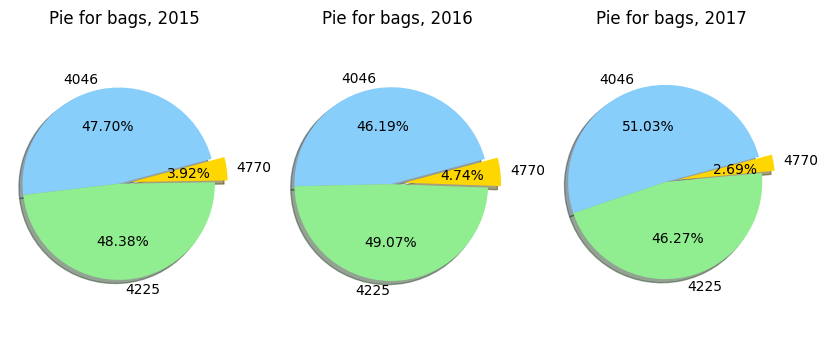

In [ ]:
pie_bags(data_TotalUS)

In [ ]:
# Calculate weekly sales value of avocados for each region (Sales Value = Price * Volume)
Price = np.array(data['AveragePrice'])
Volume = np.array(data['Total Volume'])
Value = np.multiply(Price, Volume)
scipy.stats.describe(Value)

DescribeResult(nobs=15207, minmax=(134.4504, 3788931.9776000003), mean=273306.37902936805, variance=189959759259.99765, skewness=3.221939957812599, kurtosis=14.474870416302029)

In [ ]:
data['Value'] = Value

***Avocado Sales Trend Analysis by Type***


> Average Price

As shown in the line charts below, the average price of conventional avocados oscillated steadily at around $1.00 in 2015 and became volatile during 2016 and 2017. In comparison, the average price for organic ones had always outpriced the conventional ones. Both conventional and organic ones experienced seasonal fluctuations: price peaks occurred between August and October; price troughs happened at the beginning and end of the year.

From 2015 to 2017, the average price of avocados slightly increased according to the box plot. Moreover, there are plenty of high outliers, indicating large fluctuations in prices.

> Total Sales Volume

The total sales volume for organic avocados yields a more steady growth pattern than conventional ones while at a much less volume. The sales volume of conventional avocados appeared to have more fluctuations by season: sales peaked in the first quarter of the year and bottomed out in the third quarter of the year. 

> Total Sales Value

The total sales value presents similar trends for the two types as the total sales volume.

Therefore, consumers of organic avocados tend to be less price sensitive.


In [ ]:
# avocado sales trend: volume and price
def type_trend(data,stat):
    if stat == 'Total Volume' or stat == 'Value':
        data_type_trend = data.groupby(['Date','type'])[stat].sum()
    elif stat == 'AveragePrice':
        data_type_trend = data.groupby(['Date','type'])[stat].mean()
    data_type_trend = pd.DataFrame(data_type_trend.reset_index())
    plt.figure('Trend of types',figsize=(10,6),dpi=100)
    plt.plot(data_type_trend[data_type_trend['type']=='conventional']['Date'],data_type_trend[data_type_trend['type']=='conventional'][stat],color='red',label='conventional')
    plt.plot(data_type_trend[data_type_trend['type']=='organic']['Date'],data_type_trend[data_type_trend['type']=='organic'][stat],color='blue',label='organic')
    plt.xlabel('Date')
    if stat == 'Total Volume':
        plt.ylabel('# of Avocados sold')
    elif stat == 'AveragePrice' or stat == 'Value':
        plt.ylabel('Dollars($)')
    plt.title('Trend of '+stat)
    plt.legend()
    plt.grid()
    plt.show()

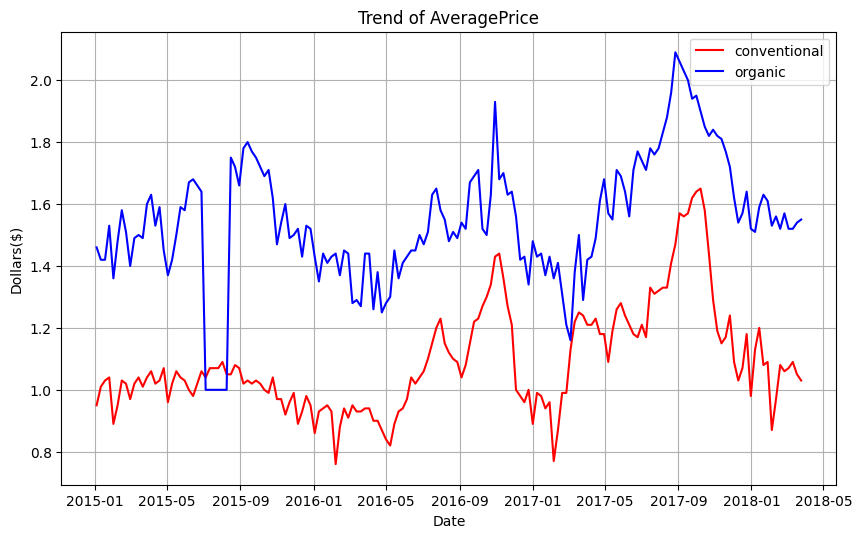

In [ ]:
type_trend(data_TotalUS,'AveragePrice') # This graph shows the different average price of conventional and organic avocado overtime.  

In [ ]:
# There are siginificant differences between Average Prices of October & February
data_TotalUS.groupby('Month')['AveragePrice'].mean().sort_values()

Month
2     1.190000
1     1.230000
3     1.239118
5     1.254643
12    1.256923
4     1.267692
7     1.319286
6     1.337083
11    1.392692
8     1.394615
9     1.519167
10    1.521786
Name: AveragePrice, dtype: float64

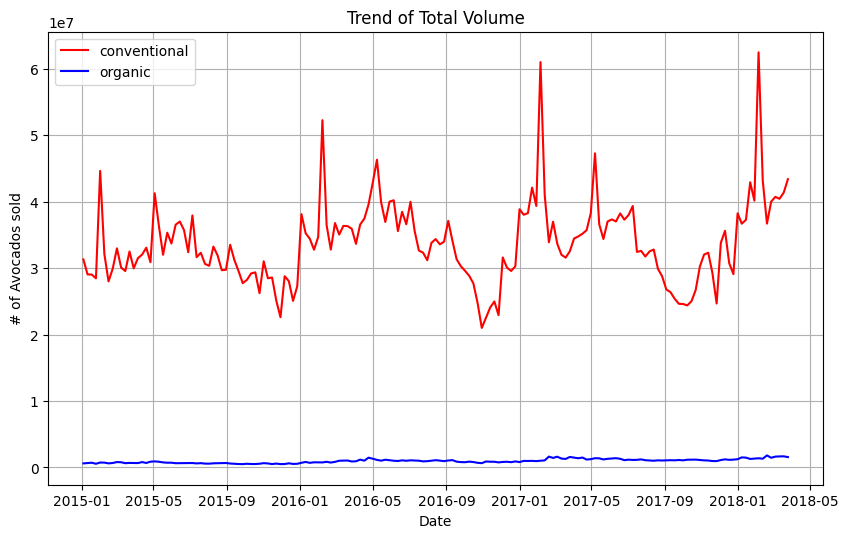

In [ ]:
type_trend(data_TotalUS,'Total Volume') # The total sales of organic avocado is much more stable than the conventional one.

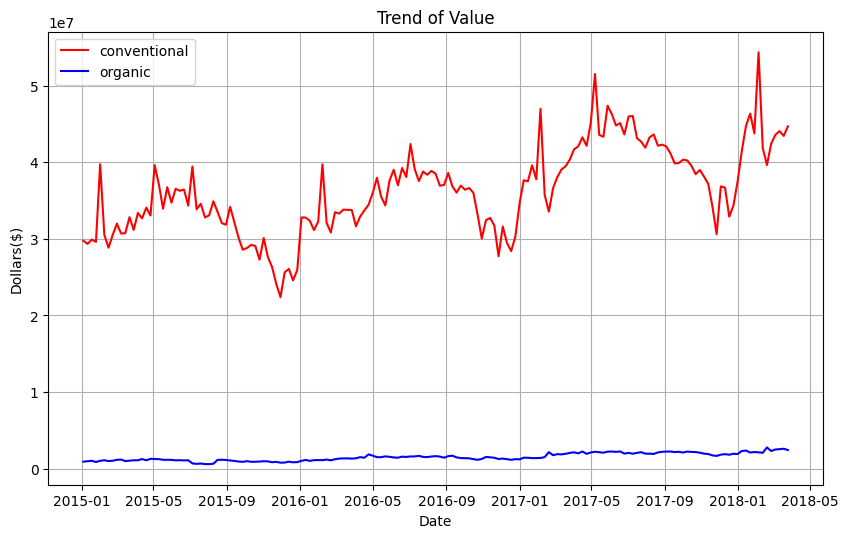

In [ ]:
data_TotalUS['Value'] = data_TotalUS['AveragePrice'] * data_TotalUS['Total Volume']
type_trend(data_TotalUS,'Value')

In [ ]:
# box plot of average price for different years and regions
def box_year(data,stat):
    sample5 = data[data['year']==2015]
    sample6 = data[data['year']==2016]
    sample7 = data[data['year']==2017]
    plt.figure('box_year',figsize=(5,3),dpi=100)
    plt.boxplot([sample5[stat],sample6[stat],sample7[stat]],labels=['2015','2016','2017'])
    plt.xlabel('Year')
    plt.ylabel('Dollars($)')
    plt.grid()
    plt.title('Box plot for '+stat)
    plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


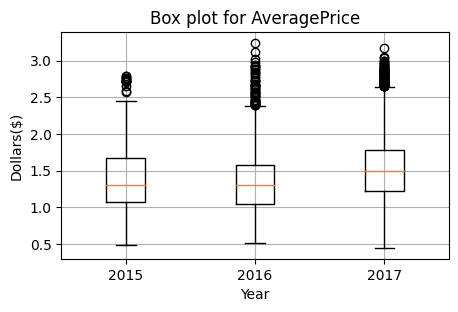

In [ ]:
box_year(data, 'AveragePrice')

<!-- LA消费量显著多于其他城市，但没有明显价格差异，总消费额居于榜首；NY的消费量和均价均在top5，总消费额在top5；SF的均价高，消费量一般，同样总消费额在top5(谁来翻译一下救救) -->


***Avocado Sales Trend Analysis by Geographical Distribution***



> The diagrams below respectively illustrate the 5 cities that had the highest average price, the largest total volume, and the highest sales value in 2015 and 2017.


> The average prices of avocado among the top cities are similar. However, for the total volume and total value, Los Angeles is much higher than the other cities. In addtion, New York ranked top5 across all dimentions. For San Francisco, the average price was slightly higher than the others but it did not rank top 5 in the total volume nor total value.


In [ ]:
# Top 5 cities for Average Price, Volume & Value
def top5plot(data,year):
    sample = data[data['year']==year]
    figuredata1 = sample.groupby('region')['AveragePrice'].mean()
    figuredata1 = pd.DataFrame(figuredata1).reset_index().sort_values(by='AveragePrice',ascending=False).reset_index(drop=True)
    figuredata1 = figuredata1[0:5]
    figuredata2 = sample.groupby('region')['Total Volume'].sum()
    figuredata2 = pd.DataFrame(figuredata2).reset_index().sort_values(by='Total Volume',ascending=False).reset_index(drop=True)
    figuredata2 = figuredata2[0:5]
    figuredata3 = sample.groupby('region')['Value'].sum()
    figuredata3 = pd.DataFrame(figuredata3).reset_index().sort_values(by='Value',ascending=False).reset_index(drop=True)
    figuredata3 = figuredata3[0:5]
    plt.figure('top5',figsize=(20,6),dpi=100)
    plt.subplot(1,3,1)
    plt.bar(figuredata1['region'],figuredata1['AveragePrice'],color='blue')
    plt.xticks(rotation = 45)
    plt.yticks(np.arange(0,figuredata1['AveragePrice'].max()+0.25,0.25))
    plt.title('Average Price')
    
    plt.subplot(1,3,2)
    plt.bar(figuredata2['region'],figuredata2['Total Volume'],color='red')
    plt.xticks(rotation = 45)
    plt.yticks(np.arange(0,figuredata2['Total Volume'].max()+0.25*1e8,0.25*1e8))
    plt.title('Total Volume')
    
    plt.subplot(1,3,3)
    plt.bar(figuredata3['region'],figuredata3['Value'],color='green')
    plt.xticks(rotation = 45)
    plt.yticks(np.arange(0,figuredata3['Value'].max()+0.25*1e8,0.25*1e8))
    plt.title('Total Value')
    plt.show()

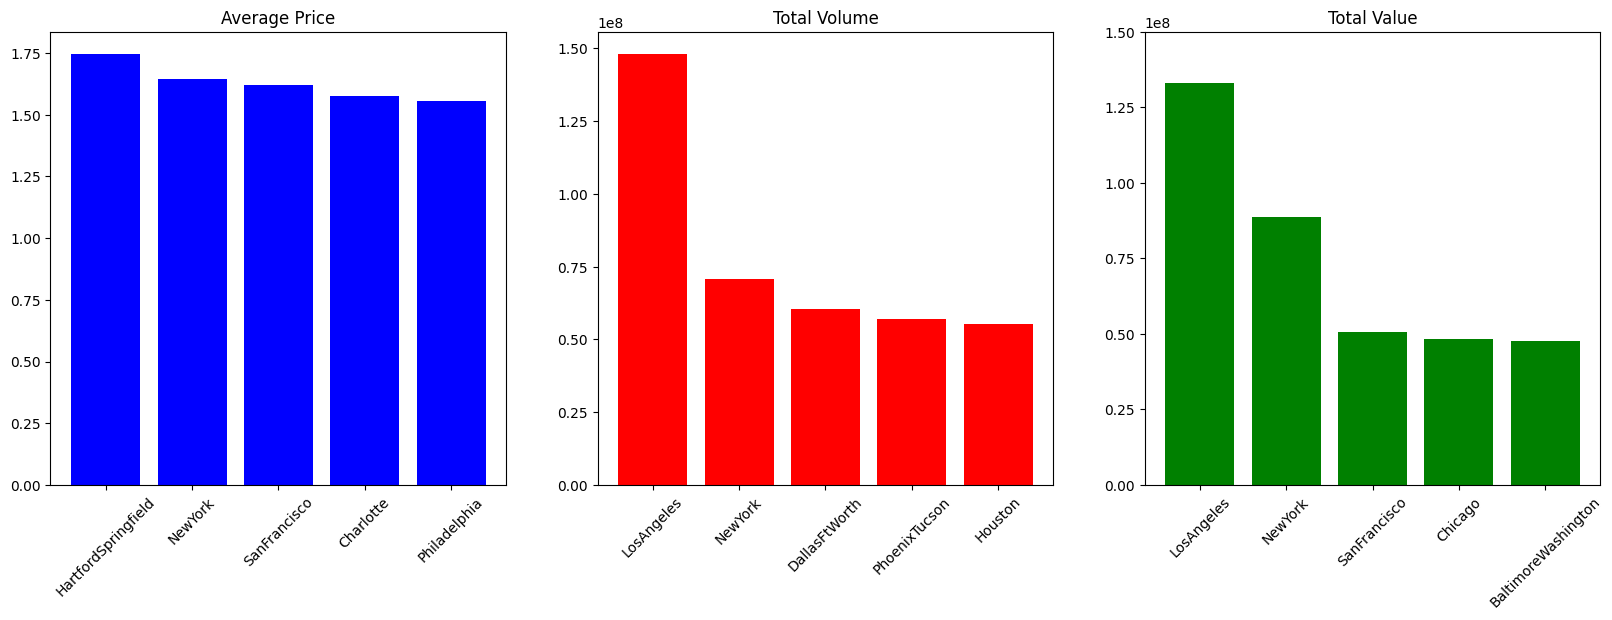

In [ ]:
top5plot(data,2015) 
# The three graphs below respectively illustrate the 5 cities that had the highest average price, the largest total volume, and the highest sales value in 2015.

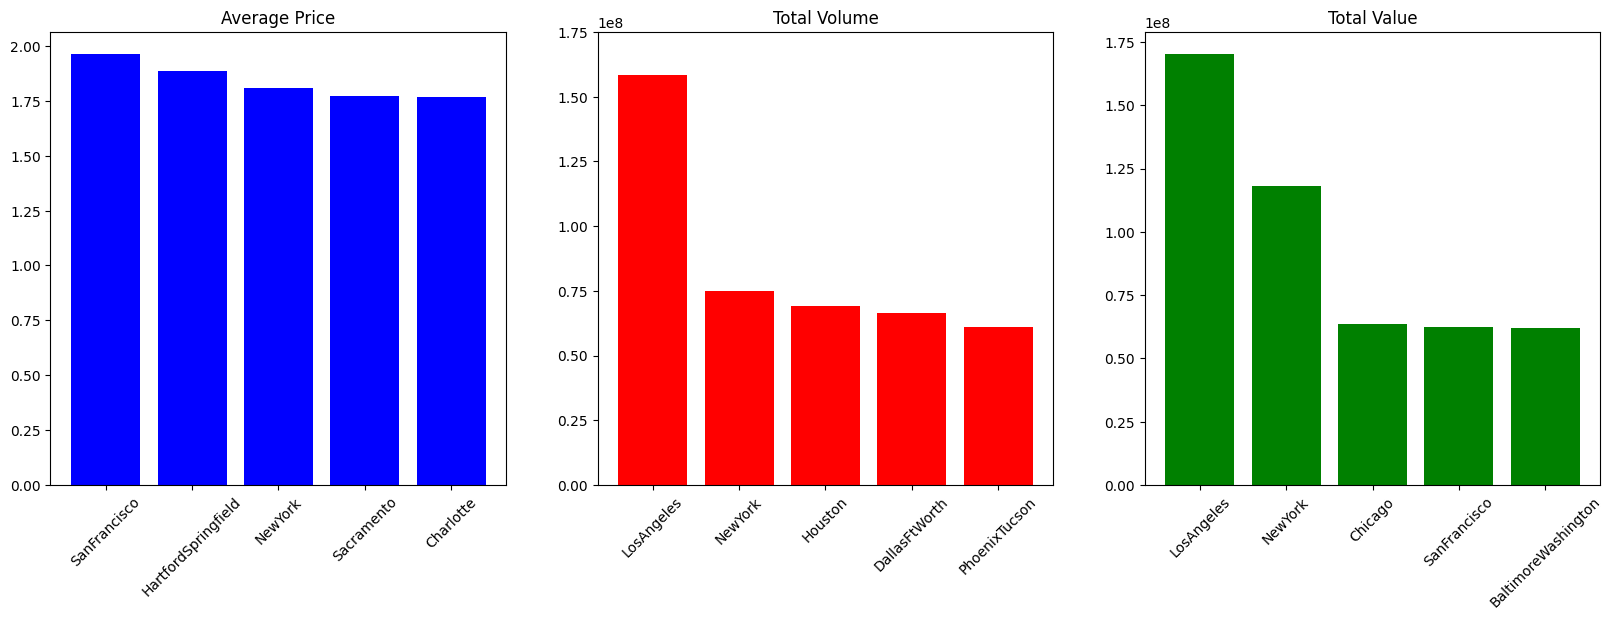

In [ ]:
top5plot(data,2017)


***Regression of Sales Value Results***



> To further explore how and whether each aspect influences the total sales value in a significant ways, we now regress the sales values on year, month, type (conventional or organic), and regions. Dummy variables are created for type and different regions. Since the coefficients of all variables have p-values less than 0.05, they are statistically significant at the 5% significance level. It is not surprising that when other variables remain the same, with a lower price and a larger demand, conventional avocados have a significantly higher sales value than organic ones. The positive coefficient of year suggests that sales values grow significantly each year, while the negative coefficient of month suggests a decrease in sales values with the passage of time within a given year. Nonetheless, these two coefficients, especially month, are much less than those of different regions. Thus, these two variables are less economically meaningful.

> Among the cities, we set Los Angeles as the base. All the other regions had negative coefficients. This indicates that, compared with Los Angeles, all the other cities had significantly lower sales values. 

> With R-square=0.678, our model explains about 67.8% of the variation in the sales values.


In [ ]:
# Create dummy variables for type and region
type_dummies = pd.get_dummies(data['type'])
data = pd.concat([data, type_dummies], axis=1, join='inner')
Region_dummies = pd.get_dummies(data['region'])
data = pd.concat([data, Region_dummies], axis=1, join='inner')

In [ ]:
# Regression of sales value on year, month, type, and region
X = data['year']
X = pd.concat([X, data['Month']], axis=1, join='inner')
X = pd.concat([X, data['conventional']], axis=1, join='inner')

for i in range(len(Region_dummies.columns)):
    X = pd.concat([X, data[Region_dummies.columns[i]]], axis=1, join='inner')

X = X.drop(columns=['LosAngeles'])
    
y = data['Value']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     679.6
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        13:24:26   Log-Likelihood:            -2.1042e+05
No. Observations:               15207   AIC:                         4.209e+05
Df Residuals:                   15159   BIC:                         4.213e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -6.907e+07   4

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


***Avocado Sales Value Breakdown by Geographical Distribution***




> After the previous trend and regression analyses, we may now better examine the breakdowns of sales value. The scatterplots below reveal the relationship between volume and average price for different cities.


> The digrams suggest that a greater volume and a lower price together of LA contribute to the sigificantly higher sales value there. It is surprising that with a population less than half of that of New York City, the volume consumed in LA almost double that of NYC.


> Apart from LA and New York, the total volume of Dallas-Fort Worth also ranked top5 from 2015 to 2017. There is also a negative correlation between average prices and the total volume.

In [ ]:
def scatter_city(data,year):
    '''
    year = 2015, 2016 or 2017
    Return a scatter plot of cities. Cities with top volumes consumed are annotated.
    '''
    sample = data[data['year']==year]
    sample1 = sample.groupby('region')['AveragePrice'].mean()
    sample2 = sample.groupby('region')['Total Volume'].sum()
    sample = pd.merge(sample1,sample2,on=['region']).reset_index()
    sample = sample.sort_values(by='Total Volume',ascending=False).reset_index(drop=True)
    plt.figure('Scatter city',figsize=(10,6),dpi=100)
    plt.scatter(sample['AveragePrice'],sample['Total Volume'])
    plt.xlabel('Average Price ($)')
    plt.ylabel('Total Volume (#)')
    plt.title('Price-Volume Relationship for Cities, '+str(year))
    for i in range(4):
        plt.annotate(sample.loc[i,'region'],
                     xy=(sample.loc[i,'AveragePrice'],sample.loc[i,'Total Volume']),
                     xytext=(sample.loc[i,'AveragePrice']+0.01,sample.loc[i,'Total Volume']-0.1*1e8),
                    arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color="r"))
    m, b = np.polyfit(sample['AveragePrice'],sample['Total Volume'],1)
    plt.plot(sample['AveragePrice'], m*sample['AveragePrice']+b,color='red')
    plt.show()

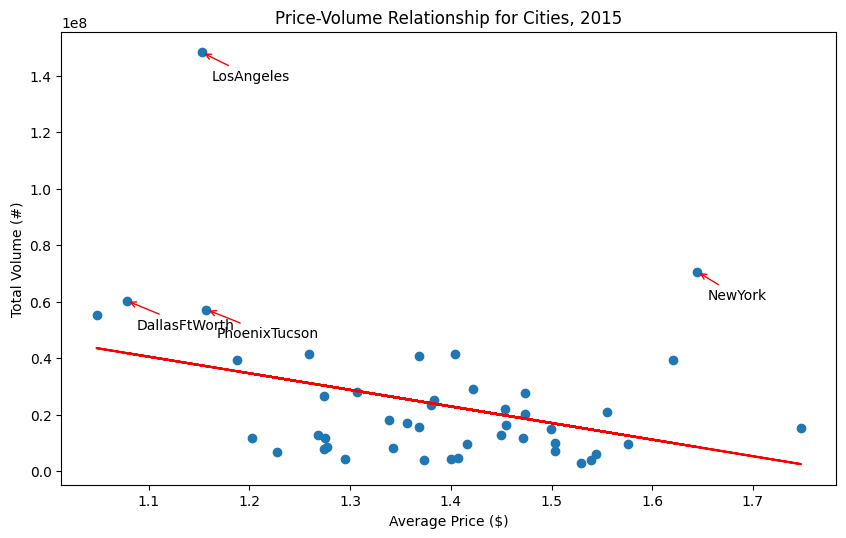

In [ ]:
scatter_city(data,2015) #scatter plot about the relation of price and volume

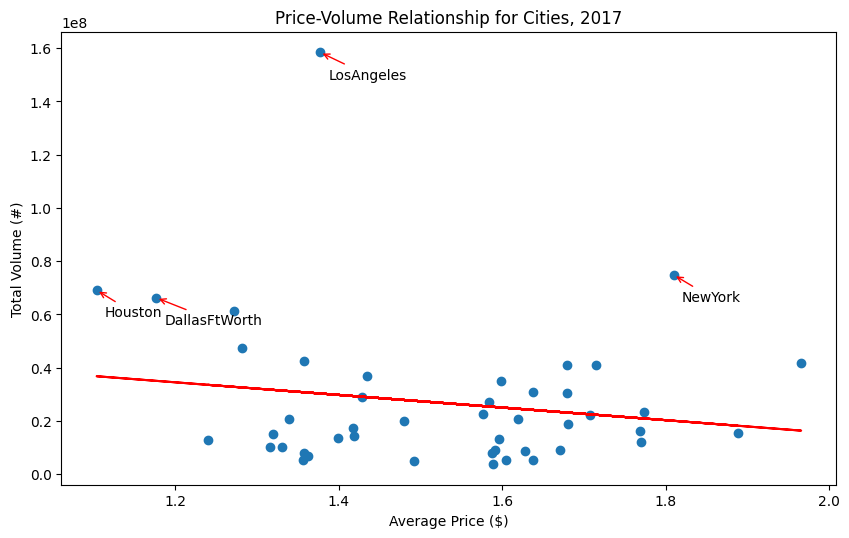

In [ ]:
scatter_city(data,2017)

***Conclusion and Business Application***

After exploring the dataset provided by Hass Avocado and using techniques such as data visualization and regression to study the sales trends by type and region, our team has come up with several recommendations for businesses involving this product. 

> Marketing Strategy

As expected, organic avocados are significantly more expensive than conventional avocados but their sales volume stay pretty constant, indicating that customers are less price sensitive when purchasing organic avocados and organic avocados have a larger profit margin. Wholesale companies and retail corporations could potentially implement marketing strategies to promote organic avocados. For example, they may use social media to highlight sustainable products, remind customers about the benefits of organic products, and emphasize the eco-aspects and support provided by organic products to local comunity.

Given the relationship of price and volume for each city, companies for organic avocados may achieve a greater success in New York, while Los Angelas may be a better place for conventional ones.

Retailers could also adjust the pricing and adapt to the seasonal volatility of sales volume by providing discounts for a specific period. For example, they may distribute coupons for avocado during its price peak months (August to October) and have bundle promotions during its volume troughs. 


